# –í—Å—Ç—É–ø–∏—Ç–µ–ª—å–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ –≤ ML —Å–µ–∫—Ç—É

## –¢–µ–∫—Å—Ç –∑–∞–¥–∞–Ω–∏—è
–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–µ—Å–Ω–∏ –Ω–∞ Spotify –ø–æ –µ—ë —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º c –ø–æ–º–æ—â—å—é –¥–∞—Ç–∞—Å–µ—Ç–∞ SpotifyFeatures.
–ú–æ–∂–Ω–æ –Ω–∞—á–∞—Ç—å —Å –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏...

### –ò–º–ø–æ—Ä—Ç –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [2]:
!gdown 1yKs0teWyaNzcJAXiGcajyInyymMQdzxB

Downloading...
From: https://drive.google.com/uc?id=1yKs0teWyaNzcJAXiGcajyInyymMQdzxB
To: /content/SpotifyFeatures.csv
100% 33.7M/33.7M [00:00<00:00, 37.1MB/s]


In [3]:
original_dataset = pd.read_csv("SpotifyFeatures.csv")

original_dataset.head(3)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910               0.0  C#     0.346    -1.828  Major   
1       137373   0.737               0.0  F#     0.151    -5.559  Minor   
2       170267   0.131               0.0   C     0.103   -13.879  Minor   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368

In [4]:
dataset = original_dataset.copy(deep=True)

#### –£–±–∏—Ä–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–≤–æ–¥–∏–º –∫ —á–∏—Å–ª–µ–Ω–Ω—ã–º

In [5]:
dataset.drop(columns=["artist_name", "track_name", "track_id"], inplace=True)
dataset.replace({"mode": {"Major": 1, "Minor": 0}}, inplace=True)

dataset.head(3)

genre  popularity  acousticness  danceability  duration_ms  energy  \
0  Movie           0         0.611         0.389        99373   0.910   
1  Movie           1         0.246         0.590       137373   0.737   
2  Movie           3         0.952         0.663       170267   0.131   

   instrumentalness key  liveness  loudness  mode  speechiness    tempo  \
0               0.0  C#     0.346    -1.828     1       0.0525  166.969   
1               0.0  F#     0.151    -5.559     0       0.0868  174.003   
2               0.0   C     0.103   -13.879     0       0.0362   99.488   

  time_signature  valence  
0            4/4    0.814  
1            4/4    0.816  
2            5/4    0.368

#### –ò—Å–ø–æ–ª—å–∑—É–µ–º One Hot Encoding –¥–ª—è –Ω–µ–±–∏–Ω–∞—Ä–Ω—ã—Ö —Å—Ç—Ä–æ—á–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [6]:
one_hot_encoding_columns = ["genre", "key", "time_signature"]
for column in one_hot_encoding_columns:
    encoded_column = pd.get_dummies(dataset[column])
    dataset = pd.concat([dataset, encoded_column], axis=1)
    dataset.drop(column, axis=1, inplace=True)

dataset.head(3)

popularity  acousticness  danceability  duration_ms  energy  \
0           0         0.611         0.389        99373   0.910   
1           1         0.246         0.590       137373   0.737   
2           3         0.952         0.663       170267   0.131   

   instrumentalness  liveness  loudness  mode  speechiness  ...  E  F  F#  G  \
0               0.0     0.346    -1.828     1       0.0525  ...  0  0   0  0   
1               0.0     0.151    -5.559     0       0.0868  ...  0  0   1  0   
2               0.0     0.103   -13.879     0       0.0362  ...  0  0   0  0   

   G#  0/4  1/4  3/4  4/4  5/4  
0   0    0    0    0    1    0  
1   0    0    0    0    1    0  
2   0    0    0    0    0    1  

[3 rows x 56 columns]

#### –¢.–∫. –¥–∞–Ω–Ω—ã–µ –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º Standard Scaler

In [7]:
scaler_columns = dataset.columns.tolist()
scaler_columns.remove("popularity")

scaler = StandardScaler()
scaler.fit(dataset[scaler_columns])
scaled_columns = scaler.transform(dataset[scaler_columns])
dataset[scaler_columns] = scaled_columns

dataset.head(3)

popularity  acousticness  danceability  duration_ms    energy  \
0           0      0.683376     -0.890935    -1.141368  1.286908   
1           1     -0.345467      0.191994    -0.821867  0.630249   
2           3      1.644570      0.585296    -0.545298 -1.669954   

   instrumentalness  liveness  loudness      mode  speechiness  ...         E  \
0         -0.489819  0.660661  1.290703  0.730526    -0.367970  ... -0.284179   
1         -0.489819 -0.322835  0.668683 -1.368876    -0.183082  ... -0.284179   
2         -0.489819 -0.564927 -0.718402 -1.368876    -0.455832  ... -0.284179   

          F        F#         G        G#       0/4       1/4       3/4  \
0 -0.308958 -0.264547 -0.357629 -0.263961 -0.005863 -0.106458 -0.339966   
1 -0.308958  3.780043 -0.357629 -0.263961 -0.005863 -0.106458 -0.339966   
2 -0.308958 -0.264547 -0.357629 -0.263961 -0.005863 -0.106458 -0.339966   

        4/4       5/4  
0  0.399024 -0.151742  
1  0.399024 -0.151742  
2 -2.506116  6.590154  

[3 rows x 56 columns]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### –†–µ–∞–ª–∏–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞

In [9]:
def evaluate_model(y_test: pd.Series,
                   y_pred: np.array) -> tuple[float, float, float]:

    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2


def create_confidence_interval_df(y_test: pd.Series,
                                  y_pred: np.array,
                                  alpha: int = 0.05) -> pd.DataFrame:

    n = len(y_pred)
    degrees_of_freedom = n - 1
    standard_error = np.std(y_pred, ddof=1) / np.sqrt(n)
    t_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    interval = t_value * standard_error
    lower_bound = y_pred - interval
    upper_bound = y_pred + interval

    result_df = pd.DataFrame({
        "y_test": y_test,
        "lower_bound": lower_bound,
        "y_pred": y_pred,
        "upper_bound": upper_bound
    })

    return result_df


def plot_result_sample(result_df: pd.DataFrame,
                       sample_size: int = 100,
                       sample_seed: int = 42) -> None:

    result_sample = result_df.sample(sample_size, random_state=sample_seed).reset_index(drop=True)
    fig, ax = plt.subplots()

    ax.scatter(result_sample.index, result_sample.y_test, label="y_test", c="blue", s=30)
    ax.errorbar(result_sample.index, result_sample.y_pred,
                yerr=(result_sample["upper_bound"] - result_sample["lower_bound"]) / 2,
                color="orange",  ecolor="lightgreen", capsize=6,
                label="confidence_interval", fmt="o", elinewidth=3)


    ax.legend()
    plt.xlabel("Index")
    plt.ylabel("Popularity")
    plt.show()


def calculate_feature_importance(X_train: pd.DataFrame,
                                 one_hot_encoded_columns: list,
                                 original_dataset: pd.DataFrame,
                                 model) -> pd.DataFrame:

    feature_importance = pd.DataFrame({
        "feature": X_train.columns,
        "importance": np.abs(model.coef_)
    })

    for column in one_hot_encoded_columns:
        unique_encodings = original_dataset[column].unique()
        encodings_filter = feature_importance.feature.isin(unique_encodings)
        encodings_mean = feature_importance[encodings_filter].importance.mean()

        feature_importance = feature_importance[~encodings_filter]
        feature_importance = pd.concat([feature_importance, pd.DataFrame({
            "feature": column,
            "importance": encodings_mean}, index=[0])])

    return feature_importance.reset_index(drop=True).sort_values(by="importance", ascending=False)

#### –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏

In [10]:
X = dataset.drop(columns=["popularity"])
y = dataset.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

### –ú–æ–¥–µ–ª—å Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

#### –û–±—É—á–∏–º –º–æ–¥–µ–ª—å

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### –û—Ü–µ–Ω–∏–º —Ç–æ—á–Ω–æ—Å—Ç—å

In [13]:
mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

print(f"MSE: {mse_lr:.3f}\nRMSE: {rmse_lr:.3f}\nR2: {r2_lr:.3f}")

MSE: 92.717
RMSE: 9.629
R2: 0.720


#### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞

In [14]:
confidence_interval_lr = create_confidence_interval_df(y_test, y_pred_lr)

confidence_interval_lr.head(5)

y_test  lower_bound     y_pred  upper_bound
788         45    45.433462  45.631365    45.829267
207109      25    34.322134  34.520037    34.717939
138644      19    35.500845  35.698748    35.896650
37164       29    39.198111  39.396013    39.593916
174351      17    20.877066  21.074968    21.272871

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

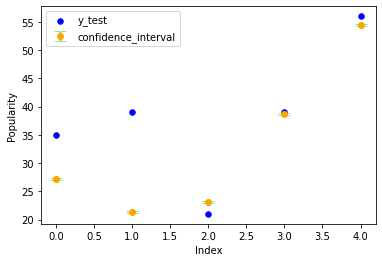

In [15]:
plot_result_sample(confidence_interval_lr, 5)

#### –û—Ü–µ–Ω–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [16]:
calculate_feature_importance(X_train, one_hot_encoding_columns, original_dataset, lr)

feature    importance
12               key  3.758565e+12
11             genre  2.845988e+12
13    time_signature  2.211617e+12
6           loudness  1.015927e+00
8        speechiness  6.699770e-01
5           liveness  4.911363e-01
1       danceability  3.452714e-01
4   instrumentalness  3.257773e-01
10           valence  3.080239e-01
3             energy  3.050868e-01
7               mode  1.538770e-01
0       acousticness  9.535005e-02
9              tempo  6.580052e-02
2        duration_ms  5.655434e-02

#### –í—ã–≤–æ–¥ –ø–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É
–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Ç–æ—á–Ω–æ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–µ –≤–ø–µ—á–∞—Ç–ª—è–µ—Ç. –î–∞–∂–µ —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
–ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –≤–µ—Å—å–º–∞ –≤–µ–ª–∏–∫–∞. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –æ–≥—Ä–æ–º–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–µ—Ä–µ–¥ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏,
–Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª –ø—Ä–∏–º–µ–Ω—ë–Ω One Hot Encoding, —á—Ç–æ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ö–æ—Ä–æ—à–∏–º –∑–Ω–∞–∫–æ–º. –ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø—Ä–∞–≤–∏—Ç—å –ø–æ—Å–ª–µ–¥–Ω–µ–µ
–ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–æ–¥–µ–ª–µ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π - –∫ –ø—Ä–∏–º–µ—Ä—É, Ridge.


### –ú–æ–¥–µ–ª—å RidgeCV

In [17]:
from sklearn.linear_model import RidgeCV

#### –û–±—É—á–∏–º –º–æ–¥–µ–ª—å

In [18]:
rr = RidgeCV()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

print("Best alpha value:", rr.alpha_)

Best alpha value: 10.0


#### –û—Ü–µ–Ω–∏–º —Ç–æ—á–Ω–æ—Å—Ç—å

In [19]:
mse_rr, rmse_rr, r2_rr = evaluate_model(y_test, y_pred_rr)

print(f"MSE: {mse_rr:.3f}\nRMSE: {rmse_rr:.3f}\nR2: {r2_rr:.3f}")

MSE: 92.717
RMSE: 9.629
R2: 0.720


#### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞

In [20]:
confidence_interval_rr = create_confidence_interval_df(y_test, y_pred_rr)

confidence_interval_rr.head(5)

y_test  lower_bound     y_pred  upper_bound
788         45    45.430925  45.628785    45.826645
207109      25    34.338876  34.536735    34.734595
138644      19    35.505054  35.702914    35.900773
37164       29    39.193076  39.390936    39.588796
174351      17    20.863611  21.061470    21.259330

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

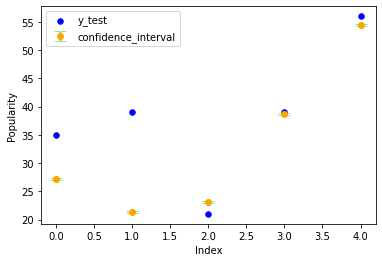

In [21]:
plot_result_sample(confidence_interval_rr, 5)

#### –û—Ü–µ–Ω–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [22]:
calculate_feature_importance(X_train, one_hot_encoding_columns, original_dataset, rr)

feature  importance
11             genre    2.354536
6           loudness    1.014269
8        speechiness    0.672711
5           liveness    0.490938
1       danceability    0.343962
4   instrumentalness    0.328888
10           valence    0.309909
3             energy    0.306525
7               mode    0.153641
0       acousticness    0.094706
9              tempo    0.067480
2        duration_ms    0.054771
13    time_signature    0.044694
12               key    0.027242

#### –í—ã–≤–æ–¥ –ø–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É
–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø—Ä–∏—à–ª–∏ –≤ –Ω–æ—Ä–º—É, –Ω–æ, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, —Å–∏–ª—å–Ω–æ –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
—ç—Ç–æ –Ω–µ —Å–∫–∞–∑–∞–ª–æ—Å—å. –î–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è - –Ω–µ —Å–∞–º–∞—è —É–¥–∞—á–Ω–∞—è –∏–¥–µ—è –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö.
–í–æ–∑–º–æ–∂–Ω–æ, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å? –ü—Ä–æ–≤–µ—Ä–∏–º...

### –ú–æ–¥–µ–ª—å Polynomial Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#### –û–±—É—á–∏–º –º–æ–¥–µ–ª—å

In [ ]:
pipeline = Pipeline([
    ("pf", PolynomialFeatures(2)),
    ("regressor", Ridge(alpha=10))
])

pipeline.fit(X_train, y_train)
y_pred_pf = pipeline.predict(X_test)

#### –û—Ü–µ–Ω–∏–º —Ç–æ—á–Ω–æ—Å—Ç—å

In [ ]:
mse_pf, rmse_pf, r2_pf = evaluate_model(y_test, y_pred_pf)

print(f"MSE: {mse_pf:.3f}\nRMSE: {rmse_pf:.3f}\nR2: {r2_pf:.3f}")

MSE: 89.369
RMSE: 9.454
R2: 0.730


#### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞

In [ ]:
confidence_interval_pf = create_confidence_interval_df(y_test, y_pred_pf)

confidence_interval_pf.head(5)

y_test  lower_bound     y_pred  upper_bound
788         45    45.557215  45.756874    45.956534
207109      25    32.043717  32.243376    32.443035
138644      19    36.109074  36.308733    36.508392
37164       29    38.619743  38.819402    39.019062
174351      17    23.182957  23.382616    23.582276

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

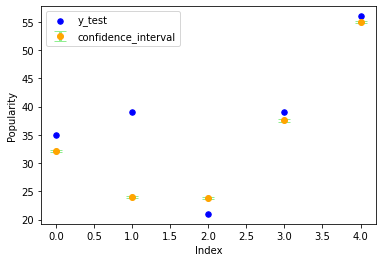

In [ ]:
plot_result_sample(confidence_interval_pf, 5)

#### –û—Ü–µ–Ω–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ 
(+ –ø–æ–ø–∞—Ä–Ω–æ, —Ç.–∫. —Å—Ç–µ–ø–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∞ 2)

In [ ]:
pf_feature_importance = pd.DataFrame({
    "feature": pipeline.named_steps["pf"].get_feature_names_out(),
    "importance": np.abs(pipeline.named_steps["regressor"].coef_)
})

pf_feature_importance = pf_feature_importance[~(pf_feature_importance.feature == "1")]
pf_feature_importance.reset_index(drop=True).sort_values(by="importance", ascending=False)

feature    importance
6                    loudness  1.657197e+00
396        loudness Reggaeton  1.392501e+00
4            instrumentalness  1.098062e+00
283   instrumentalness Comedy  1.040084e+00
1160                  Movie^2  9.686660e-01
...                       ...           ...
1535                   D# 0/4  3.328679e-06
644             A Capella 0/4  2.581615e-06
1485                    B 0/4  2.211945e-06
1569                    G 0/4  8.386496e-07
50                        0/4  1.538883e-07

[1595 rows x 2 columns]

#### –í—ã–≤–æ–¥—ã –ø–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É
–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –¥–ª—è –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, —Ç.–∫. –ø—Ä–∏ –º–∞–ª–µ–Ω—å–∫–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —Å—Ç–µ–ø–µ–Ω–∏ R^2 –¥–∞–∂–µ –≤—ã—à–µ, —á–µ–º –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ï—Å–ª–∏ –∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ç–µ–ø–µ–Ω—å –≤—ã—à–µ, —Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ä–µ—Å—É—Ä—Å–æ–≤ —ç—Ç–æ–π –º–æ–¥–µ–ª—å—é –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–µ–æ–ø—Ç–∏–º–∞–ª—å–Ω–æ (—Å —É—á—ë—Ç–æ–º 55 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Ä–∞–∑–º–µ—Ä–µ train ~200–∫ –æ–±—ä–µ–∫—Ç–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ –ø–æ—á–µ–º—É).
–ü–æ–ø—Ä–æ–±—É–µ–º –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–µ –º–æ–¥–µ–ª–∏.

P.S. –ù–∞ –º–æ—ë–º –ü–ö –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ fit —Å–æ —Å—Ç–µ–ø–µ–Ω—å—é 2 —Å—Ä–∞–∑—É –≤—ã–ª–µ—Ç–∞–µ—Ç —Å–∏–Ω–∏–π —ç–∫—Ä–∞–Ω, –∏–∑-–∑–∞ —á–µ–≥–æ —è 1 —Ä–∞–∑ –ø–æ—Ç–µ—Ä—è–ª –ø–æ–ª–Ω—É—é —Ä–∞–±–æ—Ç—É üò¢, —Ç–∞–∫ —á—Ç–æ –ø—Ä–∏—à–ª–æ—Å—å –ø—Ä–æ–≤–µ—Å—Ç–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ google colab. –ó–∞–ø—É—Å–∫–∞—Ç—å –Ω–∞ —Å–≤–æ–π —Å—Ç—Ä–∞—Ö –∏ —Ä–∏—Å–∫...

### –ú–æ–¥–µ–ª—å Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### –û–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [ ]:
param_grid = {
    "n_estimators": [256],
    "max_depth": [32, 64],
    "min_samples_split": [16, 32],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"]
}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=6)
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

print(f"Best hyperparameters: {grid_search_rf.best_params_}")

Best hyperparameters: {'max_depth': 64, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 256}


#### –û—Ü–µ–Ω–∏–º —Ç–æ—á–Ω–æ—Å—Ç—å

In [ ]:
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print(f"MSE: {mse_rf:.3f}\nRMSE: {rmse_rf:.3f}\nR2: {r2_rf:.3f}")

MSE: 87.045
RMSE: 9.330
R2: 0.737


#### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞

In [ ]:
confidence_interval_rf = create_confidence_interval_df(y_test, y_pred_rf)

confidence_interval_rf.head(5)

y_test  lower_bound     y_pred  upper_bound
788         45    43.863544  44.058487    44.253430
207109      25    32.238570  32.433513    32.628455
138644      19    35.078274  35.273217    35.468160
37164       29    38.378286  38.573229    38.768171
174351      17    22.864865  23.059808    23.254750

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

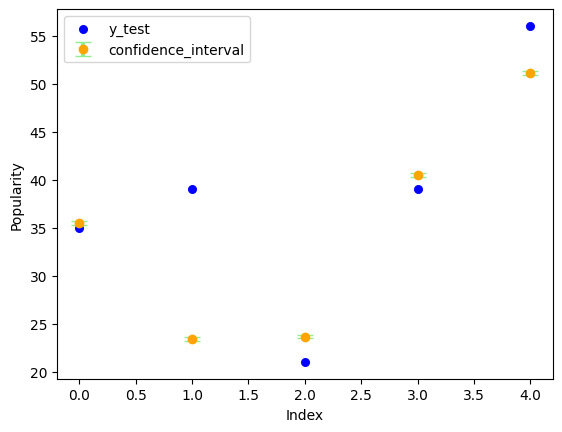

In [ ]:
plot_result_sample(confidence_interval_rf, 5)

#### –í—ã–≤–æ–¥—ã –ø–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É
–ú–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –ø–æ–∫–∞–∑–∞–ª–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —á–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–æ–¥–µ–ª–∏, —Ö–æ—Ç—è –∏–¥–µ–∞–ª—å–Ω—ã–º–∏ –∏—Ö –Ω–∞–∑–≤–∞—Ç—å —Å–ª–æ–∂–Ω–æ. –°—Ç–æ–∏—Ç —Ç–∞–∫–∂–µ –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ –±—ã–ª–∏ –ø–æ–¥–æ–±—Ä–∞–Ω—ã –Ω–µ –∏–¥–µ–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç.–∫. —ç—Ç–æ –∑–∞–Ω—è–ª–æ –±—ã —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ —Ä–µ—Å—É—Ä—Å–æ–≤. –ù–æ, –ø—Ä–æ–≤–µ–¥—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –≤–ø–æ–ª–Ω–µ –ø–æ–Ω—è—Ç–Ω–æ, –≤ –∫–∞–∫—É—é —Å—Ç–æ—Ä–æ–Ω—É –∫–∞–∂–¥—ã–π –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–æ–¥–µ–ª—å –∏–∑ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ñ—Ä–µ–π–º—Ñ–æ—Ä–∫–∞ –¥–ª—è ML - Keras –∏ –ø—Ä–æ–≤–µ–¥—ë–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ.

### –ú–æ–¥–µ–ª—å MLP

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

#### –†–∞–∑–¥–µ–ª–∏–º train –≤—ã–±–æ—Ä–∫—É, –æ—Ç–¥–µ–ª–∏–≤ validation –¥–∞–Ω–Ω—ã–µ

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=42)

#### –°–æ—Å—Ç–∞–≤–∏–º –º–æ–¥–µ–ª—å –∏ –æ–±—É—á–∏–º –µ—ë

In [26]:
model = Sequential()
model.add(Dense(1024, input_dim=55, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
y_pred_mlp = model.predict(X_test)

Epoch 1/50
5891/5891 [==============================] - 40s 7ms/step - loss: 122.7899 - val_loss: 93.8829
Epoch 2/50
5891/5891 [==============================] - 39s 7ms/step - loss: 113.1346 - val_loss: 91.8915
Epoch 3/50
5891/5891 [==============================] - 38s 7ms/step - loss: 111.2699 - val_loss: 92.3380
Epoch 4/50
5891/5891 [==============================] - 39s 7ms/step - loss: 109.3910 - val_loss: 91.4747
Epoch 5/50
5891/5891 [==============================] - 39s 7ms/step - loss: 108.2979 - val_loss: 93.0440
Epoch 6/50
5891/5891 [==============================] - 39s 7ms/step - loss: 107.3134 - val_loss: 90.9555
Epoch 7/50
5891/5891 [==============================] - 39s 7ms/step - loss: 106.1009 - val_loss: 90.5996
Epoch 8/50
5891/5891 [==============================] - 39s 7ms/step - loss: 105.4583 - val_loss: 90.5667
Epoch 9/50
5891/5891 [==============================] - 39s 7ms/step - loss: 103.5302 - val_loss: 89.6726
Epoch 10/50
5891/5891 [=======================

#### –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏ –æ—Ü–µ–Ω–∏–º train –∏ validation loss

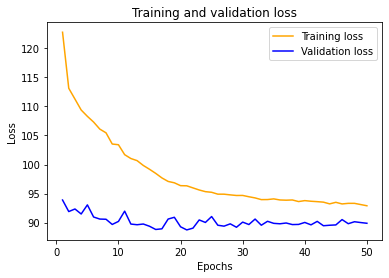

In [27]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = np.arange(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "orange", label="Training loss")
plt.plot(epochs, val_loss, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### –û—Ü–µ–Ω–∏–º —Ç–æ—á–Ω–æ—Å—Ç—å

In [28]:
mse_mlp, rmse_mlp, r2_mlp = evaluate_model(y_test, y_pred_mlp)

print(f"MSE: {mse_mlp:.3f}\nRMSE: {rmse_mlp:.3f}\nR2: {r2_mlp:.3f}")

MSE: 89.273
RMSE: 9.448
R2: 0.731


#### –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —É—á—ë—Ç–æ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞

In [29]:
y_pred_mlp = list(y_pred_mlp.flat)
confidence_interval_mlp = create_confidence_interval_df(y_test, y_pred_mlp)

confidence_interval_mlp.head(5)

y_test  lower_bound     y_pred  upper_bound
788         45    44.914516  45.108131    45.301746
207109      25    31.150856  31.344469    31.538082
138644      19    35.009228  35.202843    35.396458
37164       29    37.515415  37.709030    37.902645
174351      17    22.823734  23.017347    23.210960

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

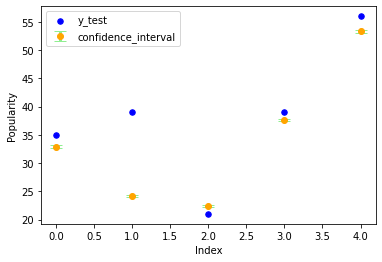

In [30]:
plot_result_sample(confidence_interval_mlp, 5)

#### –í—ã–≤–æ–¥—ã –ø–æ –º–æ–¥–µ–ª–∏

### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –µ–¥–∏–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏

In [32]:
model_validation_df = pd.DataFrame({
    "model": ["linear", "ridge", "polynomial", "random forest", "multi-layer perceptron"],
    "mse": [mse_lr, mse_rr, mse_pf, mse_rf, mse_mlp],
    "rmse": [rmse_lr, rmse_rr, rmse_pf, rmse_rf, rmse_mlp],
    "r^2": [r2_lr, r2_rr, r2_pf, r2_rf, r2_mlp]
})

model_validation_df

model        mse      rmse       r^2
0                  linear  92.716939  9.628964  0.720202
1                   ridge  92.717042  9.628969  0.720202
2              polynomial  89.369000  9.454000  0.730000
3           random forest  87.045000  9.330000  0.737000
4  multi-layer perceptron  89.272734  9.448425  0.730596

### –û–±—â–∏–π –≤—ã–≤–æ–¥
–ü–æ —Å–≤–æ–¥–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ –∏–¥—ë—Ç random forest, –ø–æ—Å–ª–µ –Ω–µ–≥–æ mlp, –∞ –¥–∞–ª–µ–µ polynomial. –° —É—á—ë—Ç–æ–º –Ω–µ—Å—É—Ä–∞–∑–Ω–æ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ—Å—É—Ä—Å–æ–≤, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ (—É–∂–µ —Å—Ç–µ–ø–µ–Ω—å 3 –∫—Ä–∞—à–∏—Ç –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π –∫–æ–ª–∞–± –ø–æ –ø–∞–º—è—Ç–∏), –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –ø–æ–±–µ–¥–∏—Ç–µ–ª—è–º–∏ 2 –≤—ã—à–µ–æ–ø–∏—Å–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏. –£—á—Ç—ë–º —Ç–∞–∫–∂–µ –∏ —Ç–æ, —á—Ç–æ —É –Ω–∏—Ö –µ—Å—Ç—å –∑–∞–¥–µ–ª –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ, –∑–∞–∫–ª—é—á–∞—é—â–∏–π—Å—è –≤ –ø–æ–¥–±–æ—Ä–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏ –∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. 

–ò–∑ –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å—Ç–∞–ª–æ –¥–æ–≤–æ–ª—å–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —Ç–æ—á–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–µ—Å–Ω–∏ –Ω–∞ Spotify –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É –µ—ë —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –¥–æ–≤–æ–ª—å–Ω–æ –ø—Ä–æ–±–ª–µ–º–∞—Ç–∏—á–Ω–æ (–ª–∏–±–æ —è –¥–µ–ª–∞–ª —á—Ç–æ-—Ç–æ —Å–æ–≤—Å–µ–º –Ω–µ —Ç–∞–∫), –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –±–µ–∑ –æ–±–ª–∞–¥–∞–Ω–∏—è –≤–Ω—É—à–∏—Ç–µ–ª—å–Ω—ã–º–∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä–µ—Å—É—Ä—Å–∞–º–∏, —Ç–∞–∫ –∫–∞–∫ –æ—Ç–ª–∏—á–∏—è –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–µ —Å–ª–∏—à–∫–æ–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è. –í —Ü–µ–ª–æ–º, —Ç–∞–∫–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —è–≤–ª—è–µ—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ –ª–æ–≥–∏—á–Ω—ã–º, –∏–Ω–∞—á–µ "—Ñ–æ—Ä–º—É–ª–∞" –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ —Ç—Ä–µ–∫–∞ –±—ã–ª–∞ –±—ã –æ—á–µ–≤–∏–¥–Ω–∞ –≤—Å–µ–º, –∏ –º–Ω–æ–≥–∏–µ –±—ã —Å—Ç–∞—Ä–∞–ª–∏—Å—å –∏–¥–µ–∞–ª—å–Ω–æ –µ–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å, –∞ —Ç–∞–∫–æ–≥–æ –≤ —Ä–µ–∞–ª—å–Ω–æ–º –º–∏—Ä–µ –≤—Ä–æ–¥–µ –ø–æ–∫–∞ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–µ—Å–Ω–∏ –º–æ–≥—É—Ç –≤–ª–∏—è—Ç—å —Å–æ–±—ã—Ç–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∏–∫–∞–∫ –Ω–µ –æ—Ç—Ä–∞–∂–µ–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ (–∞–∫—Ç—É–∞–ª—å–Ω–∞—è —Ç–µ–º–∞, –∫–∞–∫–∏–µ-–ª–∏–±–æ –≤–µ—â–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –∞—Ä—Ç–∏—Å—Ç–æ–º / –≥—Ä—É–ø–ø–æ–π).

–ß—Ç–æ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å?
+ –ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–º–µ–Ω–∏—Ç—å One Hot Encoding, –Ω–∞, –∫ –ø—Ä–∏–º–µ—Ä—É, Hashing Trick –∏–ª–∏ –¥—Ä—É–≥–∏–µ –∞–Ω–∞–ª–æ–≥–∏. –Ø –Ω–µ —É–≤–µ—Ä–µ–Ω, —á—Ç–æ —ç—Ç–æ –¥–∞—Å—Ç –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç, –Ω–æ –Ω–µ–±–æ–ª—å—à–æ–π –≤–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–µ–Ω.
+ –° –±–æ–ª—å—à–∏–º–∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä–µ—Å—É—Ä—Å–∞–º–∏ –ø–æ–¥–æ–±—Ä–∞—Ç—å –±–æ–ª–µ–µ —É–¥–∞—á–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è Random Forest. –ù–µ –∑–Ω–∞—é, –Ω–∞ –∫–∞–∫–æ–º —ç—Ç–∞–ø–µ –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å MSE, –Ω–æ –∑–∞–¥–µ–ª –¥–ª—è –ø—Ä–æ–≥—Ä–µ—Å—Å–∞ —Ç–∞–º —Ç–æ—á–Ω–æ –µ—Å—Ç—å.
+ –ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ–∏–≥—Ä–∞—Ç—å—Å—è —Å–æ —Å–ª–æ—è–º–∏, —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏ –ø—Ä–æ—á–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ MLP. –õ–∏—á–Ω–æ —è –ø—Ä–æ–≤—ë–ª –æ–∫–æ–ª–æ 5 –∑–∞–ø—É—Å–∫–æ–≤ —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∏, —É–≤–µ—Ä–µ–Ω, —á—Ç–æ –º–æ–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å –∏—Ö —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–µ–µ, —á—Ç–æ –æ–ø—è—Ç—å –∂–µ —Ç—Ä–µ–±—É–µ—Ç –≤—Ä–µ–º–µ–Ω–∏ –∏ —Ä–µ—Å—É—Ä—Å–æ–≤.